#### Supervised learning

- Classification : class/label

- Regression : numerical value

##### Problem Statement

Can we build a model that can predict how many bikes would be rented.

#### Regression 

- single : single input

- multi - more than one input

- polynomial : relationship between the input and output is a polynomial relationship


y = F(X)

Where y is the output/label/dependent variable
X is the input/features/independent variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('day_bike_rentals.csv')

#### Data Profiling

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The data consists of the following columns:

`instant` : A unique row identifier

`dteday` : The date on which the data was observed; in this case, the data was collected daily, so there's one row per date.

`season` : A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)

`yr` : The year of the study in which the observation was made (the study took place over two years: year 0 represents 2011, and year 1 represents 2012)

`mnth` : The calendar month in which the observation was made (1:January ... 12:December)

`holiday` : A binary value indicating whether or not the observation was made on a public holiday)

`weekday` : The day of the week on which the observation was made (0:Sunday ... 6:Saturday)

`workingday` : A binary value indicating whether or not the day is a working day (not a weekend or holiday)

`weathersit`: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)

`temp` : The temperature in celsius (normalized)

`atemp` : The apparent ("feels-like") temperature in celsius (normalized)

`hum` : The humidity level (normalized)

`windspeed` : The windspeed (normalized)

`casual`: The number of bikes rented by casual members

`registered`: The number of bikes rented by registered members

`cnt` : The number of bikes rentals recorded.

In this dataset, cnt represents the label (the y value) we must train our model to predict. The other columns are potential features (x values).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df.shape

(731, 16)

#### Data Cleaning, Exploration and Transformation

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- There are 4 seasons : 1, 2, 3, 4

- Month is Jan - December

- Holiday tells us if there's an holiday in that period - 0 : no holiday while 1 : holiday

- Weekday is between 0 (Sunday) to 6 (Saturday)

- Workind day is between 0 (no) and 1 (yes)

In [9]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [10]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [11]:
df.rename( columns = {'cnt': 'total no of bikes rented'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   731 non-null    int64  
 1   dteday                    731 non-null    object 
 2   season                    731 non-null    int64  
 3   yr                        731 non-null    int64  
 4   mnth                      731 non-null    int64  
 5   holiday                   731 non-null    int64  
 6   weekday                   731 non-null    int64  
 7   workingday                731 non-null    int64  
 8   weathersit                731 non-null    int64  
 9   temp                      731 non-null    float64
 10  atemp                     731 non-null    float64
 11  hum                       731 non-null    float64
 12  windspeed                 731 non-null    float64
 13  casual                    731 non-null    int64  
 14  registered

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

instant                     0
dteday                      0
season                      0
yr                          0
mnth                        0
holiday                     0
weekday                     0
workingday                  0
weathersit                  0
temp                        0
atemp                       0
hum                         0
windspeed                   0
casual                      0
registered                  0
total no of bikes rented    0
dtype: int64

In [15]:
df.drop(['instant', 'dteday','yr', ], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season                    731 non-null    int64  
 1   mnth                      731 non-null    int64  
 2   holiday                   731 non-null    int64  
 3   weekday                   731 non-null    int64  
 4   workingday                731 non-null    int64  
 5   weathersit                731 non-null    int64  
 6   temp                      731 non-null    float64
 7   atemp                     731 non-null    float64
 8   hum                       731 non-null    float64
 9   windspeed                 731 non-null    float64
 10  casual                    731 non-null    int64  
 11  registered                731 non-null    int64  
 12  total no of bikes rented  731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [17]:
features = df.drop('total no of bikes rented', axis=1)

In [18]:
label = df['total no of bikes rented']

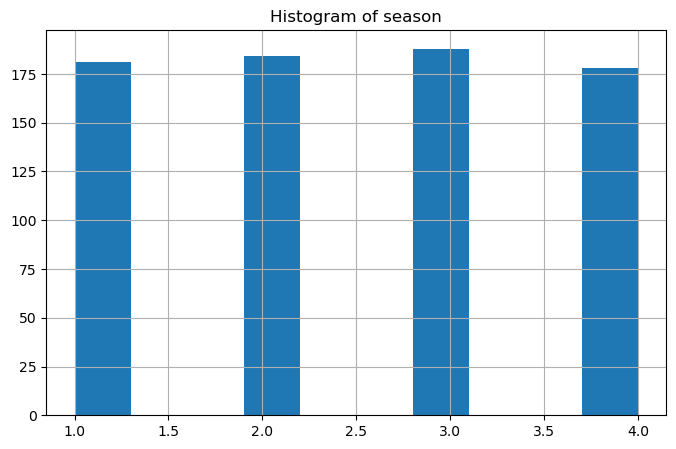

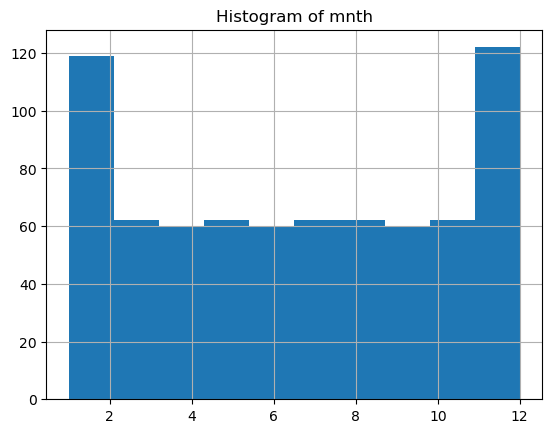

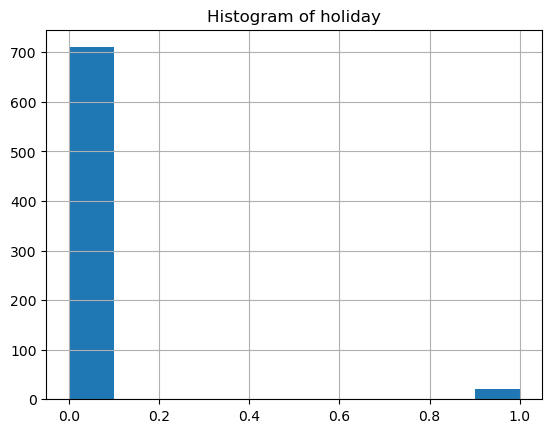

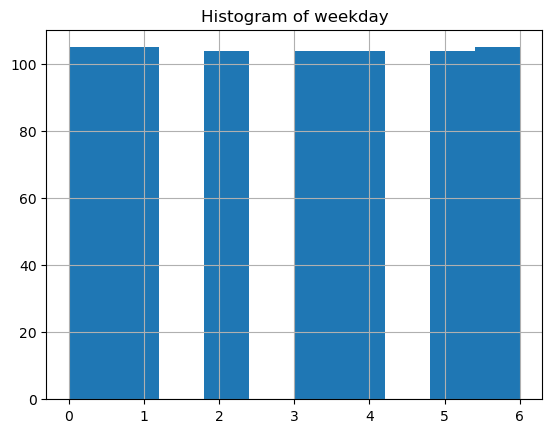

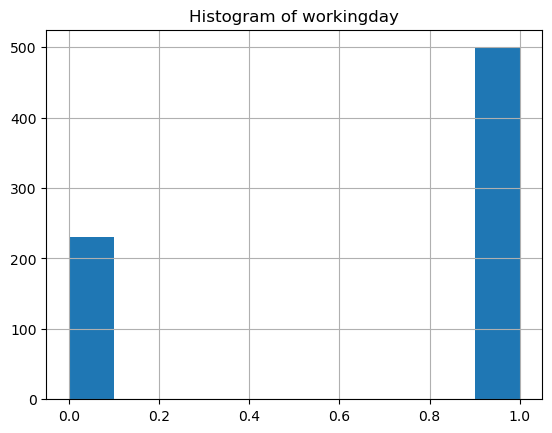

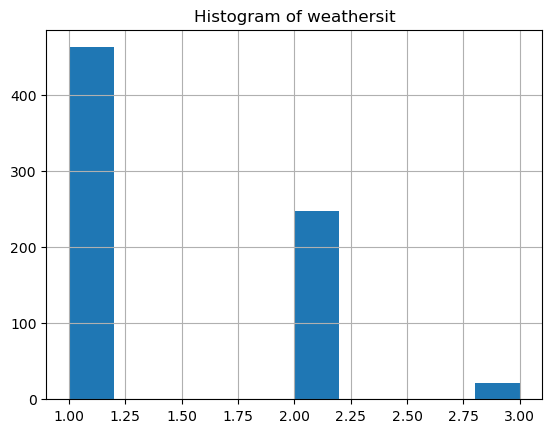

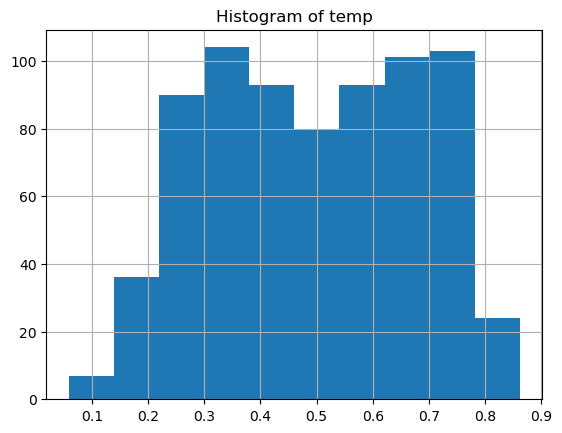

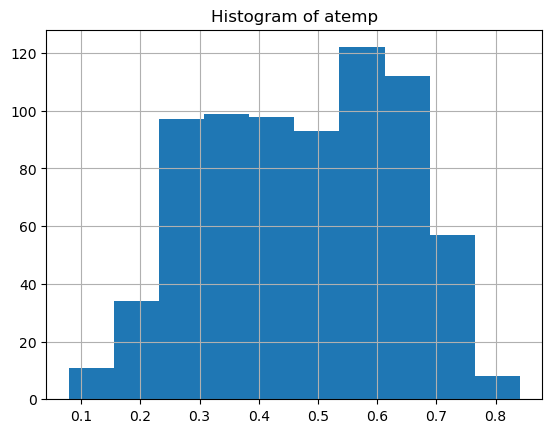

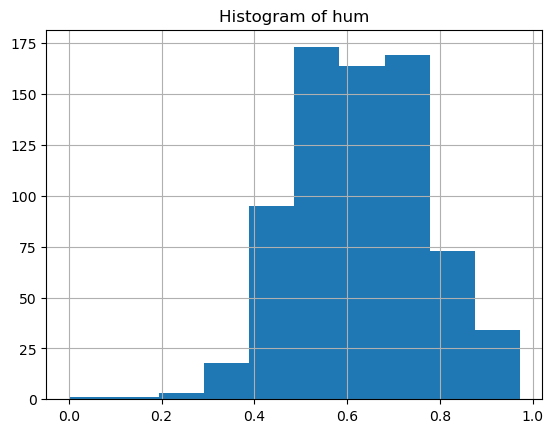

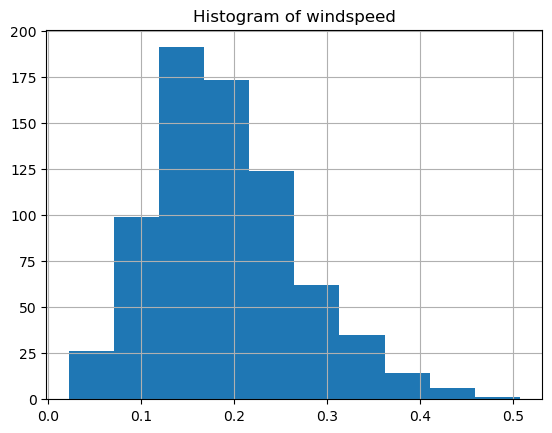

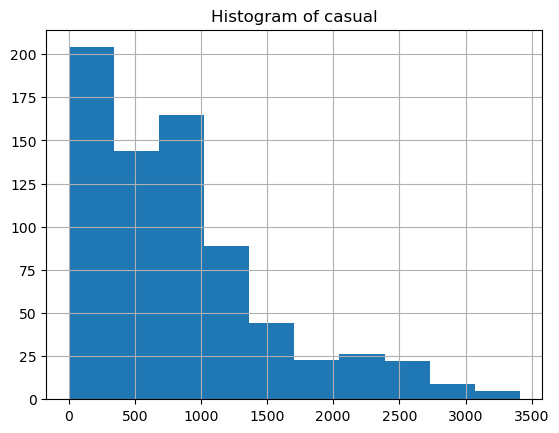

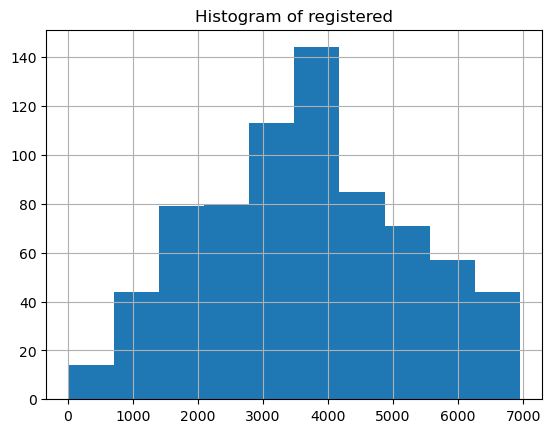

In [19]:
plt.figure(figsize=(8,5))

for col in features.columns:
    features[col].hist()
    plt.title(f'Histogram of {col}')
    plt.show()

Season, month , holiday are ordinal whereas temp, hum follow a normal distribution

#### Feature Selection

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

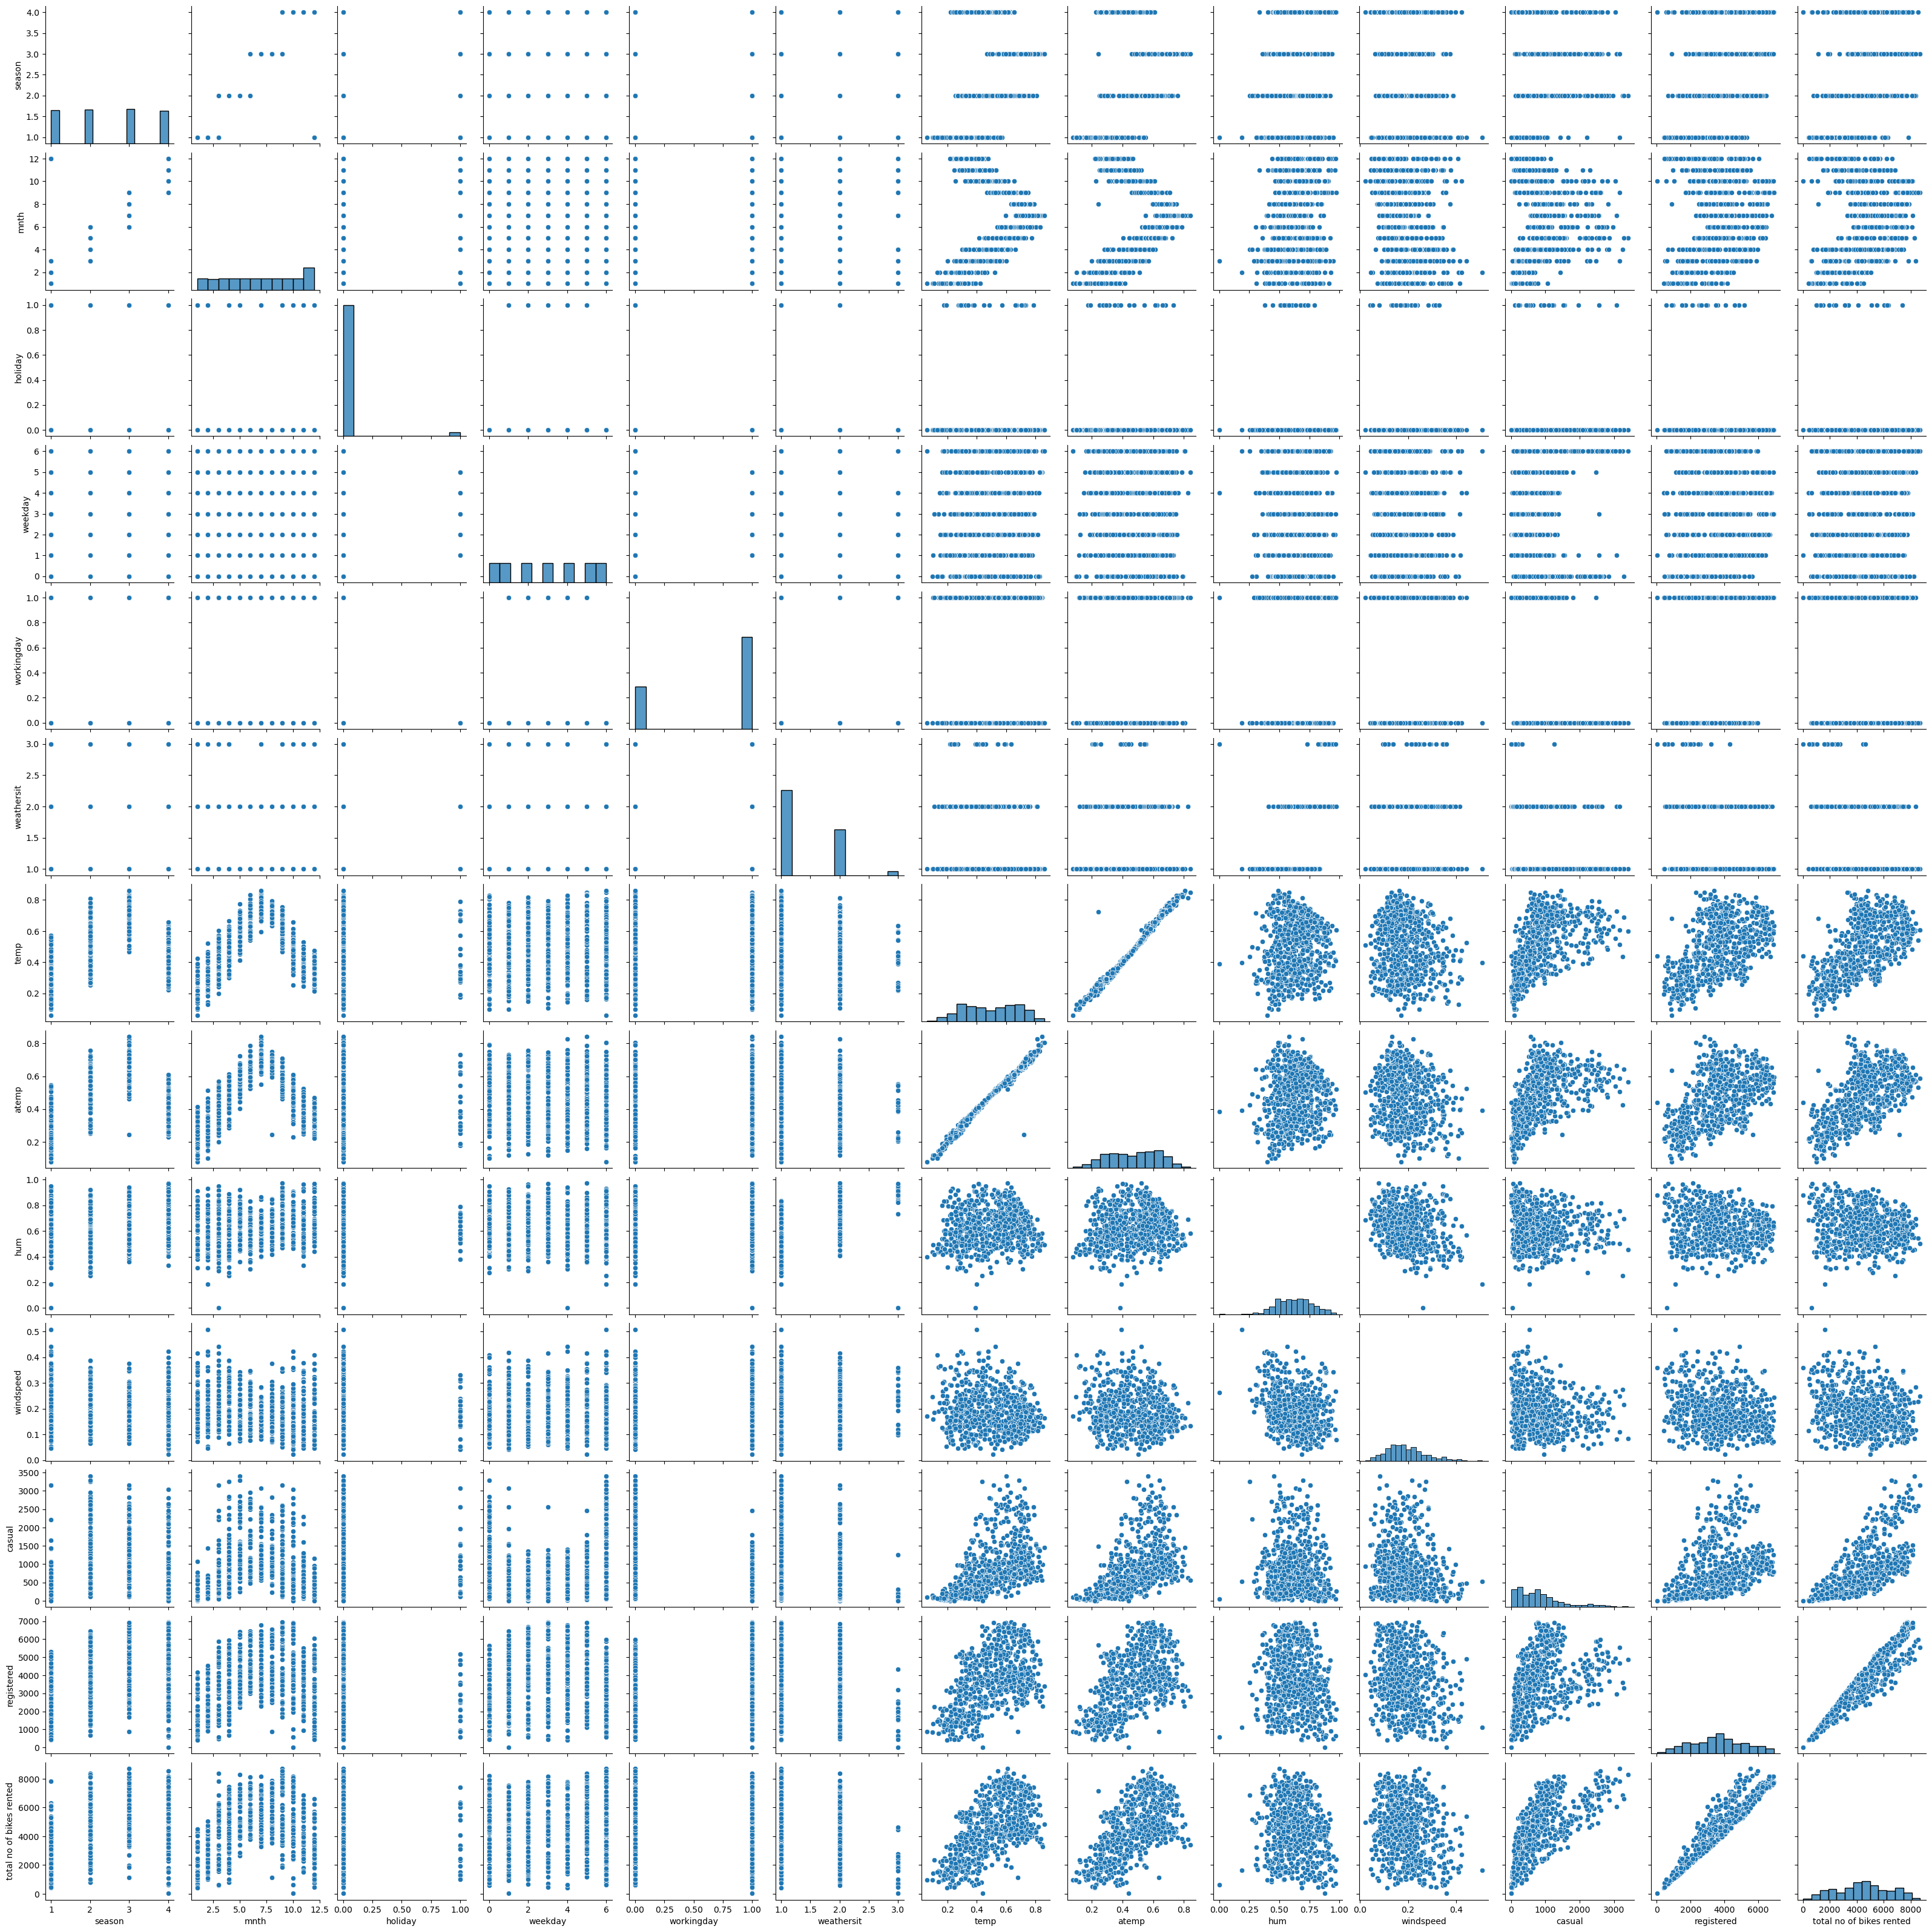

In [18]:
sb.pairplot(df)

plt.show()

In [20]:
features.corr()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449


In [21]:
X = features[['temp', 'registered']]

In [22]:
X

,temp,registered
0,0.344167,654
1,0.363478,670
2,0.196364,1229
3,0.200000,1454
4,0.226957,1518
...,...,...
726,0.254167,1867
727,0.253333,2451
728,0.253333,1182
729,0.255833,1432


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[-0.82666213, -1.9254707 ],
       [-0.72109471, -1.91520896],
       [-1.63465665, -1.5566892 ],
       ...,
       [-1.32322427, -1.58683308],
       [-1.30955752, -1.42649329],
       [-1.52822548, -0.87620714]])

In [25]:
label

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: total no of bikes rented, Length: 731, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X_scaled, label, test_size=0.3, random_state=0)

In [27]:
## Linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

print('mse', mean_squared_error(model.predict(X_test), y_test))

print('R2', r2_score(model.predict(X_test), y_test))

mse 362307.72833602445
R2 0.8990205112960541


In [29]:
print('rmse', np.sqrt(mean_squared_error(model.predict(X_test), y_test)))

rmse 601.9200348352133


In [30]:
X_test

array([[ 1.04568227e+00, -9.69557799e-02],
       [ 1.39190472e+00,  1.16616816e-01],
       [-1.43255825e+00, -1.68688510e+00],
       [-1.65756211e+00, -1.50281503e+00],
       [-8.40328880e-01,  1.12127302e-01],
       [-2.11658496e-01, -1.27256709e+00],
       [-1.38770998e-01, -7.93471812e-01],
       [-2.34438230e-01,  1.29735900e+00],
       [-3.16438715e-01, -3.28198653e-02],
       [-1.59576655e+00, -1.62082511e+00],
       [-1.91901246e+00, -1.38865310e+00],
       [-9.31442353e-01, -1.66572025e+00],
       [-7.16338680e-01, -1.48485697e+00],
       [ 1.15957001e+00,  2.65412137e-01],
       [ 1.37368421e+00, -3.98748159e-02],
       [ 7.63234337e-01, -2.21379454e-01],
       [ 4.80786400e-01,  1.76426846e+00],
       [-5.80660678e-01,  5.06563176e-01],
       [-1.04988932e+00, -2.49599257e-01],
       [-3.55060944e-01, -1.27000166e+00],
       [ 1.15501625e+00,  1.85021059e+00],
       [-1.32322427e+00, -1.58683308e+00],
       [-9.63329608e-01,  7.85554405e-01],
       [ 1.

In [31]:
y_test

196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
391    3456
571    8173
306    3974
200    4332
235    5130
Name: total no of bikes rented, Length: 220, dtype: int64

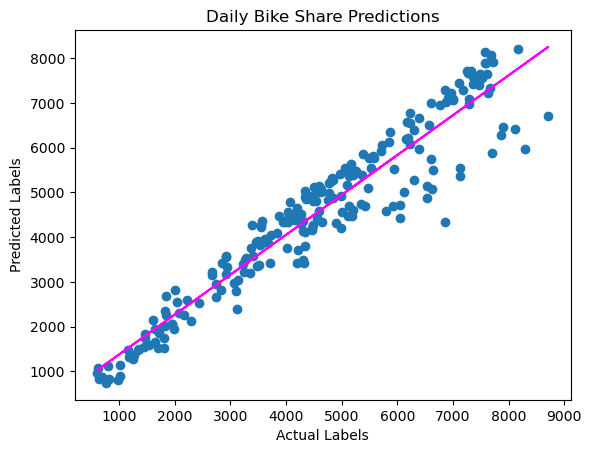

In [32]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, model.predict(X_test), 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()